# **IoT Application - Predictions**

In [1]:
import numpy as np

In [2]:
import pandas as pd

# Assuming the CSV file is in the extracted directory
file_path = '../preprocess/output_data/no_nmhc_correct_format.csv'
data = pd.read_csv(file_path, sep=';')

# Display the first few rows of the dataset
data.head(10)


,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,"2,0",1292,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"
5,10/03/2004,23.00.00,"1,2",1197,"4,7",750,89,1337,96,1393,949,"11,2","59,2","0,7848"
6,11/03/2004,00.00.00,"1,2",1185,"3,6",690,62,1462,77,1333,733,"11,3","56,8","0,7603"
7,11/03/2004,01.00.00,"1,0",1136,"3,3",672,62,1453,76,1333,730,"10,7","60,0","0,7702"
8,11/03/2004,02.00.00,"0,9",1094,"2,3",609,45,1579,60,1276,620,"10,7","59,7","0,7648"
9,11/03/2004,05.00.00,"0,7",1066,"1,1",512,16,1918,28,1182,422,"11,0","56,2","0,7366"


In [3]:
data.shape

(6941, 14)

In [4]:
# Replace commas with dots in specific columns (e.g., starting from column 2 onwards)
columns_to_replace = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

for col in columns_to_replace:
    data[col] = data[col].replace({',': '.'}, regex=True)

# Convert columns that should be numeric to actual numeric types
data[columns_to_replace] = data[columns_to_replace].apply(pd.to_numeric, errors='coerce')

# Display the first few rows to check the changes
data.head(10)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
5,10/03/2004,23.00.00,1.2,1197,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
6,11/03/2004,00.00.00,1.2,1185,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
7,11/03/2004,01.00.00,1.0,1136,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
8,11/03/2004,02.00.00,0.9,1094,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648
9,11/03/2004,05.00.00,0.7,1066,1.1,512,16,1918,28,1182,422,11.0,56.2,0.7366


In [5]:
import pandas as pd

# Assuming the dataframe is named 'data'
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S')

# Extract additional temporal features
data['Year'] = data['datetime'].dt.year
data['Month'] = data['datetime'].dt.month
data['Day'] = data['datetime'].dt.day
data['Hour'] = data['datetime'].dt.hour

data.drop(columns=['Date', 'Time', 'datetime'], inplace=True)

data.head()


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Hour
0,2.6,1360,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004,3,10,18
1,2.0,1292,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004,3,10,19
2,2.2,1402,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004,3,10,20
3,2.2,1376,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004,3,10,21
4,1.6,1272,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004,3,10,22


In [6]:
data = data.astype({'CO(GT)':'float64',
             'C6H6(GT)':'float64',
             'T':'float64',
             'RH':'float64',
             'AH':'float64'})

In [7]:
data.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Hour
0,2.6,1360,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004,3,10,18
1,2.0,1292,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004,3,10,19
2,2.2,1402,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004,3,10,20
3,2.2,1376,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004,3,10,21
4,1.6,1272,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004,3,10,22


In [8]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Display the correlation matrix
corr_matrix


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Hour
CO(GT),1.000000,0.877014,0.930008,0.914310,0.786456,-0.701038,0.673840,0.630834,0.853480,0.018334,0.064753,0.059346,-0.062863,0.117747,0.008363,0.334863
PT08.S1(CO),0.877014,1.000000,0.877430,0.886068,0.707705,-0.762895,0.628263,0.675910,0.897166,0.028277,0.169234,0.149752,0.008029,-0.030808,0.017307,0.287104
C6H6(GT),0.930008,0.877430,1.000000,0.982705,0.718344,-0.725722,0.603241,0.761805,0.861154,0.189003,-0.021592,0.187072,-0.156601,0.149455,0.006162,0.312121
PT08.S2(NMHC),0.914310,0.886068,0.982705,1.000000,0.705359,-0.781630,0.633310,0.774288,0.876777,0.228333,-0.046084,0.205590,-0.171024,0.148116,0.000271,0.349429
NOx(GT),0.786456,0.707705,0.718344,0.705359,1.000000,-0.662166,0.757029,0.233793,0.788550,-0.275998,0.232255,-0.144186,0.217982,0.134490,-0.007137,0.212155
PT08.S3(NOx),-0.701038,-0.762895,-0.725722,-0.781630,-0.662166,1.000000,-0.641377,-0.511223,-0.793364,-0.099495,-0.116479,-0.223381,-0.173039,-0.030982,0.005305,-0.275140
NO2(GT),0.673840,0.628263,0.603241,0.633310,0.757029,-0.641377,1.000000,0.142612,0.702524,-0.214325,-0.075333,-0.349646,0.384341,-0.189580,-0.000331,0.351247
PT08.S4(NO2),0.630834,0.675910,0.761805,0.774288,0.233793,-0.511223,0.142612,1.000000,0.574242,0.566586,-0.009160,0.646390,-0.518358,0.195997,0.002206,0.197884
PT08.S5(O3),0.853480,0.897166,0.861154,0.876777,0.788550,-0.793364,0.702524,0.574242,1.000000,-0.046146,0.164821,0.075807,0.032893,0.063839,-0.012790,0.213664
T,0.018334,0.028277,0.189003,0.228333,-0.275998,-0.099495,-0.214325,0.566586,-0.046146,1.000000,-0.563909,0.660638,-0.525330,0.277769,-0.009404,0.187500


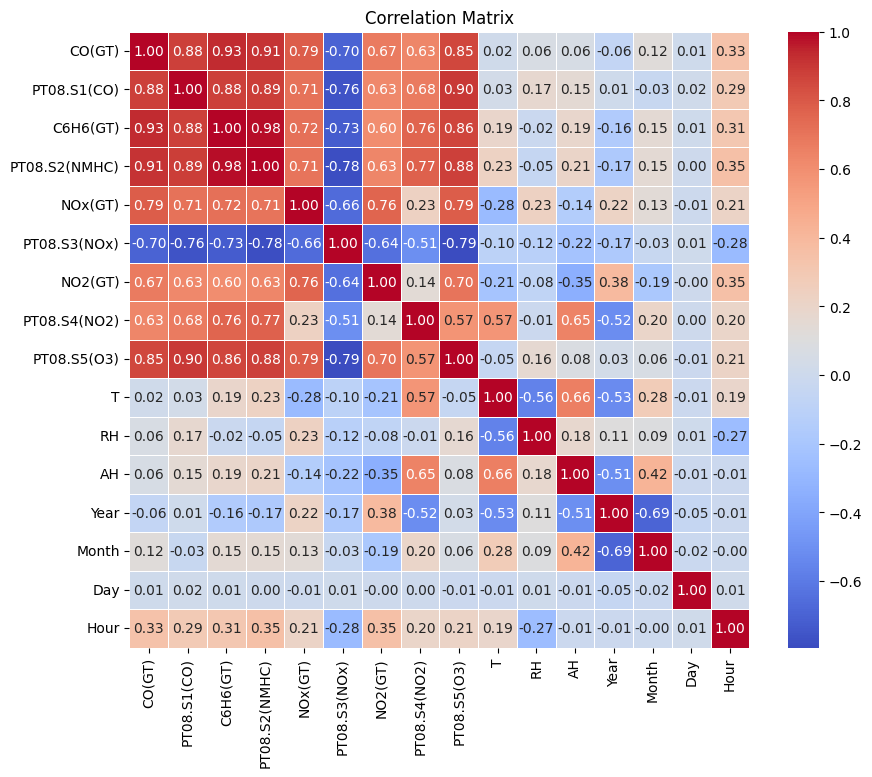

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix')
plt.show()


<Figure size 1500x1000 with 0 Axes>

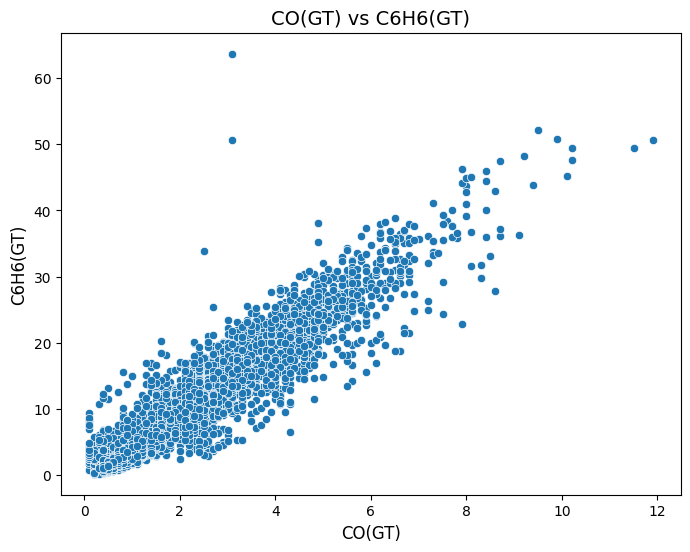

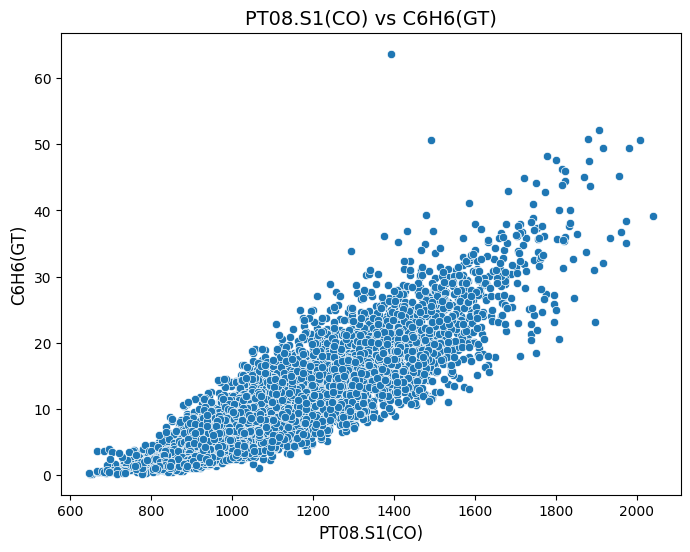

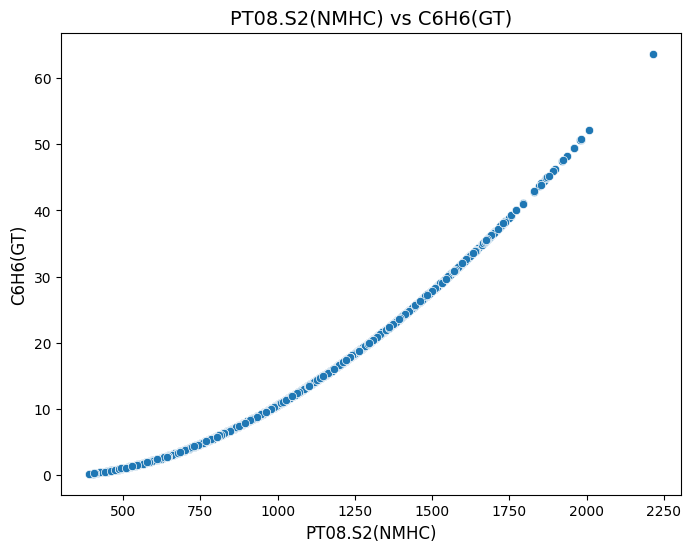

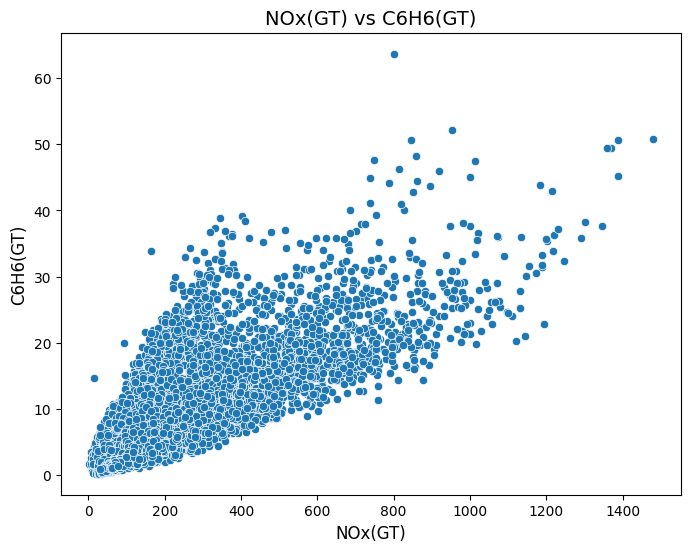

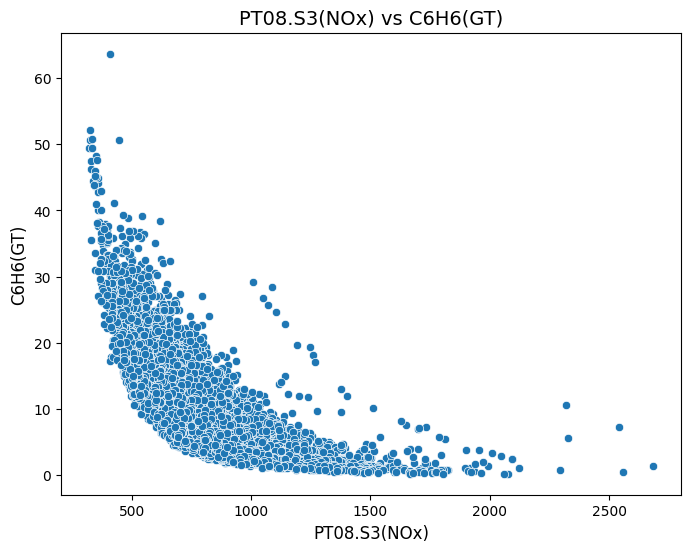

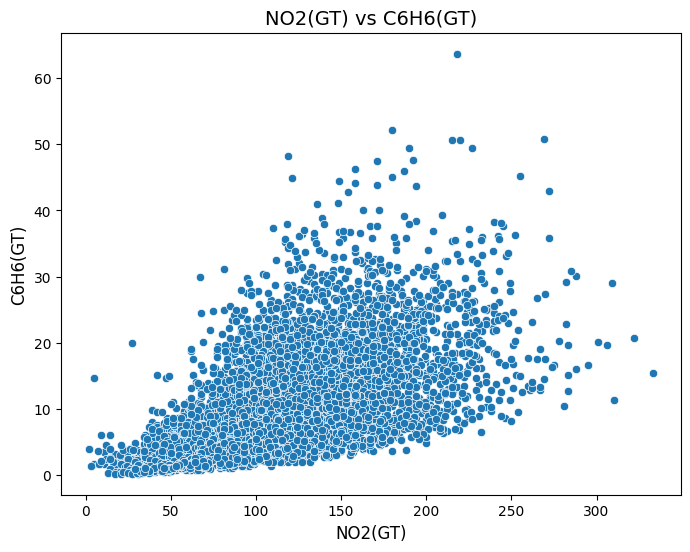

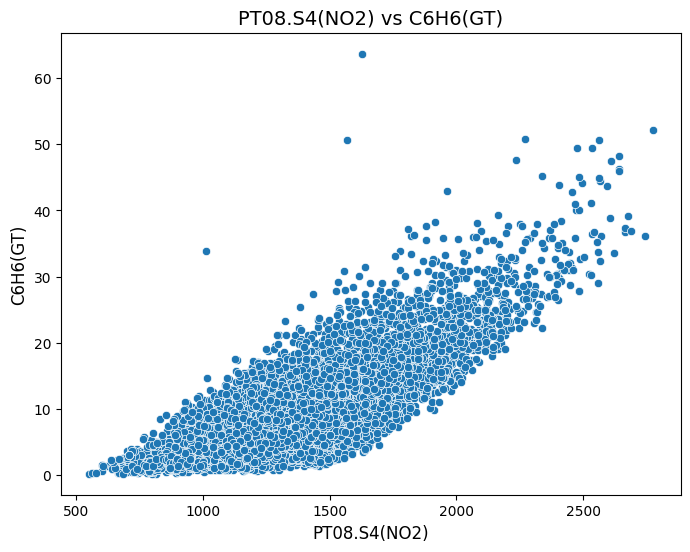

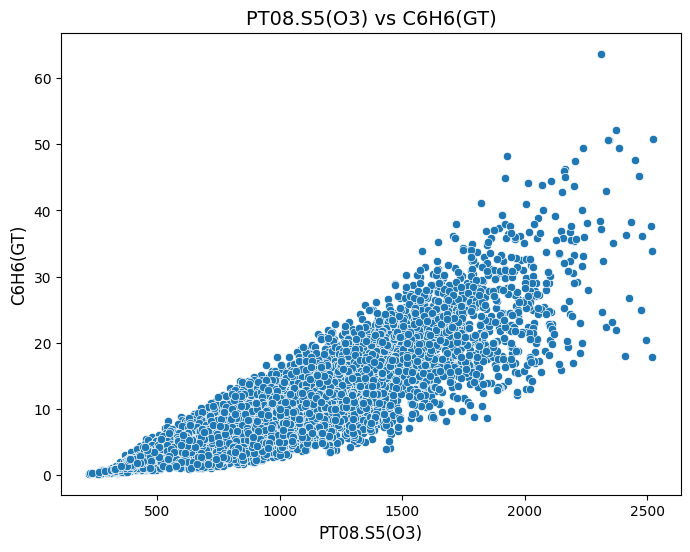

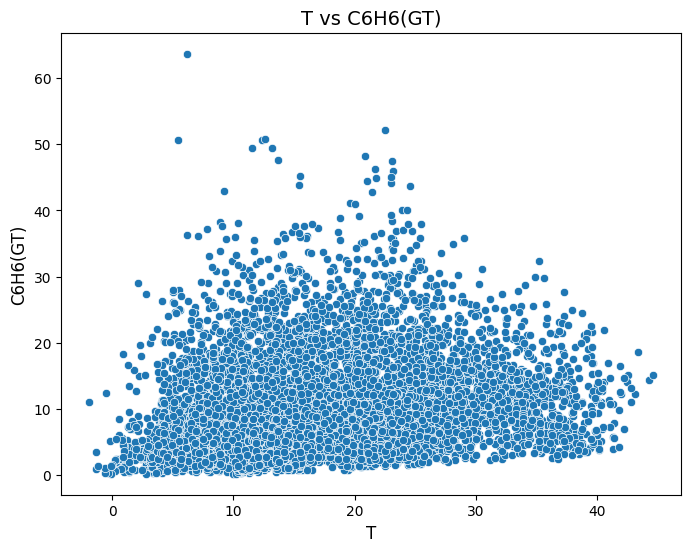

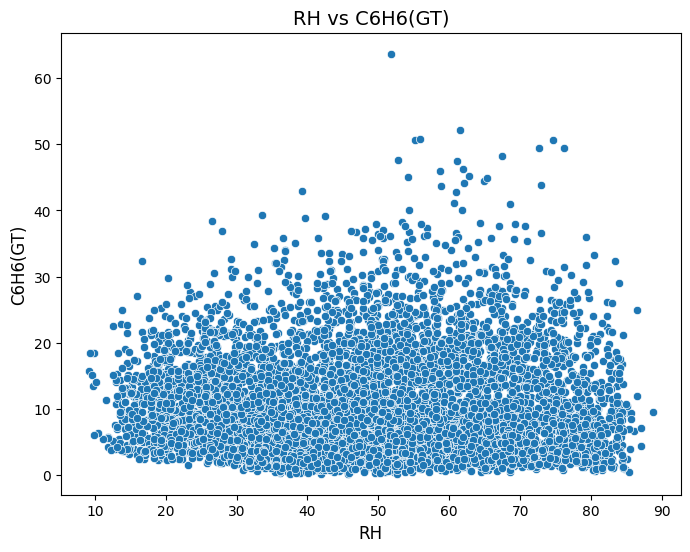

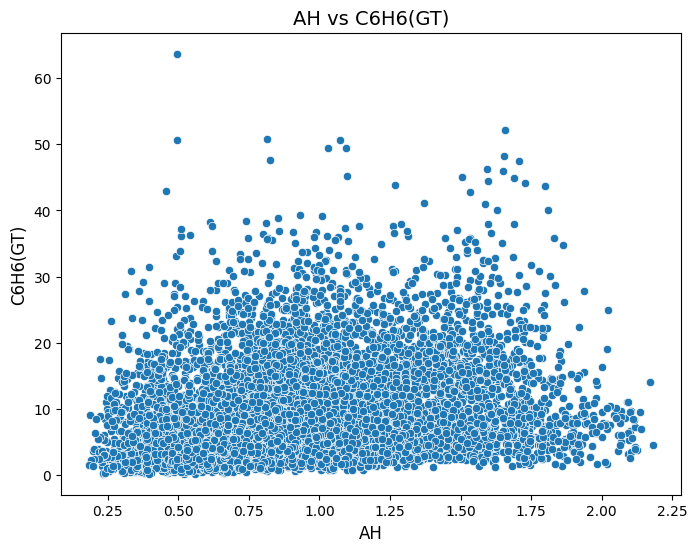

In [20]:
# Get the column names, excluding 'C6H6(GT)'
columns = data.columns.tolist()
columns.remove('C6H6(GT)')
columns.remove('Year')
columns.remove('Month')
columns.remove('Day')
columns.remove('Hour')

# Set the plot size
plt.figure(figsize=(15, 10))

# Loop through each column and plot it against 'C6H6(GT)'
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[column], y=data['C6H6(GT)'])
    plt.title(f'{column} vs C6H6(GT)', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('C6H6(GT)', fontsize=12)
    plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Step 3: Split based on datetime: Train data (March 2004 to December 2004) and Test data (January and February 2005)
train_data = data[data['Year'] == 2004]  # March 2004 to December 2004
test_data = data[data['Year'] == 2005]  # January 2005 and February 2005

# Separate features and target for train and test
X_train = train_data.drop(columns=['C6H6(GT)'])
y_train = train_data[['C6H6(GT)']]
X_test = test_data.drop(columns=['C6H6(GT)'])
y_test = test_data[['C6H6(GT)']]

X_train.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)
X_test.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)

X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)

# Step 4: Scale the features
scaler = StandardScaler()
X_train_shuffled_scaled = scaler.fit_transform(X_train_shuffled)  # Scale the training features
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for the test set

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train_shuffled_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train_shuffled.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (4991, 11)
X_test shape: (1950, 11)
y_train shape: (4991, 1)
y_test shape: (1950, 1)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize the Linear Regression model
LinReg = LinearRegression()

# Perform cross-validation (default is 5-fold cross-validation)
cv_scores = cross_val_score(LinReg, X_train_shuffled_scaled, y_train_shuffled, cv=5, scoring='r2')

# Display the cross-validation scores
print(f"Cross-validation R² scores: {cv_scores}")

# Calculate the average R² score across all folds
print(f"Average R² score: {np.mean(cv_scores)}")


Cross-validation R² scores: [0.9852099  0.98155335 0.97738396 0.98346842 0.98558708]
Average R² score: 0.9826405419542826


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Initialize the PolynomialFeatures and Linear Regression model
degree = 3
PolyReg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Perform cross-validation (default is 5-fold cross-validation)
cv_scores = cross_val_score(PolyReg, X_train_shuffled_scaled, y_train_shuffled, cv=5, scoring='r2')

# Display the cross-validation scores
print(f"Cross-validation R² scores: {cv_scores}")

# Calculate the average R² score across all folds
print(f"Average R² score: {np.mean(cv_scores)}")


Cross-validation R² scores: [0.99998205 0.99998207 0.99998183 0.99998263 0.99998399]
Average R² score: 0.9999825141806953


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the PolynomialFeatures and Random Forest Regressor model
degree = 3
RdnForest = make_pipeline(PolynomialFeatures(degree), RandomForestRegressor(n_estimators=10, random_state=42))

# Perform cross-validation (default is 5-fold cross-validation)
cv_scores = cross_val_score(RdnForest, X_train_shuffled_scaled, y_train_shuffled, cv=5, scoring='r2')

# Display the cross-validation scores
print(f"Cross-validation R² scores: {cv_scores}")

# Calculate the average R² score across all folds
print(f"Average R² score: {np.mean(cv_scores)}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklea

Cross-validation R² scores: [0.99907297 0.99983419 0.99438934 0.99946725 0.99990146]
Average R² score: 0.9985330425029091


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
from torch.utils.data import DataLoader, TensorDataset

# Check if CUDA is available and set the device to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert the data to PyTorch tensors and move to GPU
X_train_tensor = torch.tensor(X_train_shuffled_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_shuffled.values.flatten(), dtype=torch.float32).to(device)  # Flatten to 1D
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values.flatten(), dtype=torch.float32).to(device)  # Flatten to 1D

# Create a Dataset and DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        # 3 hidden layers with 64 neurons each (classic configuration)
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 1)  # Output layer with 1 neuron (regression)

        # ReLU activation
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)  # Linear output
        return x

# Initialize the model and move to GPU
input_dim = X_train.shape[1]  # 12 input features
model = SimpleNN(input_dim).to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train the model
num_epochs = 30
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)  # Squeeze to match shape

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print the loss for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

    # Evaluate on the test set after each epoch
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No need to compute gradients during evaluation
        y_pred = model(X_test_tensor).squeeze()  # Get predictions
        r2 = r2_score(y_test_tensor.cpu().numpy(), y_pred.cpu().numpy())  # Move to CPU for R² calculation
        print(f"R² score on the test set after Epoch {epoch+1}: {r2}")


Using device: cpu
Epoch 1/30, Loss: 145.24322783641327
R² score on the test set after Epoch 1: 0.5030068755149841
Epoch 2/30, Loss: 15.408777126899132
R² score on the test set after Epoch 2: 0.8408777713775635
Epoch 3/30, Loss: 5.778300994481796
R² score on the test set after Epoch 3: 0.8498913049697876
Epoch 4/30, Loss: 3.3170041915697928
R² score on the test set after Epoch 4: 0.8740368485450745
Epoch 5/30, Loss: 1.926575446740175
R² score on the test set after Epoch 5: 0.9249008893966675
Epoch 6/30, Loss: 1.1827850601611993
R² score on the test set after Epoch 6: 0.9551458358764648
Epoch 7/30, Loss: 0.8338144551485013
R² score on the test set after Epoch 7: 0.9647117853164673
Epoch 8/30, Loss: 0.6313351346896245
R² score on the test set after Epoch 8: 0.9733439683914185
Epoch 9/30, Loss: 0.5016376425822576
R² score on the test set after Epoch 9: 0.9801375865936279
Epoch 10/30, Loss: 0.40505695304809475
R² score on the test set after Epoch 10: 0.9851084351539612
Epoch 11/30, Loss: 0.

I got nice results with several models but the best one is the polynomial regression with degree = 3. Thus, I will use this one for the predictions.

In [17]:
# Fit the model on the training data
PolyReg.fit(X_train_shuffled_scaled, y_train_shuffled)

# Predict the target values on the test data
y_pred = PolyReg.predict(X_test_scaled)

# Calculate the R² score on the test set
r2 = r2_score(y_test, y_pred)

# Display the R² score
print(f"R² score on the test set: {r2}")


R² score on the test set: 0.9999628265172229


In [18]:
# Use the model to predict the whole dataset

X_to_predict = data.drop(columns=['C6H6(GT)'])
X_to_predict.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)

# Scale the features
X_to_predict_scaled = scaler.transform(X_to_predict)

# Display the shapes of the resulting datasets
print(f"X_to_predict_scaled shape: {X_to_predict_scaled.shape}")

y_predicted = PolyReg.predict(X_to_predict_scaled)

print(f"y_predicted shape: {y_predicted.shape}")


X_to_predict_scaled shape: (6941, 11)
y_predicted shape: (6941, 1)


In [19]:
# Assuming the CSV file is in the extracted directory
file_path = '../preprocess/output_data/no_nmhc_correct_format.csv'
predictions = pd.read_csv(file_path, sep=';')

predictions['C6H6(GT) predicted'] = y_predicted

# Convert decimal points to commas in the last column
predictions["C6H6(GT) predicted"] = predictions["C6H6(GT) predicted"].astype(str).str.replace(".", ",", regex=False)

# Save predictions
predictions.to_csv("./output_data/predictions.csv", index=False, sep=";")

# Display the first few rows of the dataset
predictions.head(10)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C6H6(GT) predicted
0,10/03/2004,18.00.00,"2,6",1360,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578","11,875054925755641"
1,10/03/2004,19.00.00,"2,0",1292,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255","9,392743289774316"
2,10/03/2004,20.00.00,"2,2",1402,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502","8,987127560680749"
3,10/03/2004,21.00.00,"2,2",1376,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867","9,199617259938893"
4,10/03/2004,22.00.00,"1,6",1272,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888","6,499745555912156"
5,10/03/2004,23.00.00,"1,2",1197,"4,7",750,89,1337,96,1393,949,"11,2","59,2","0,7848","4,717745640347863"
6,11/03/2004,00.00.00,"1,2",1185,"3,6",690,62,1462,77,1333,733,"11,3","56,8","0,7603","3,6195622866781907"
7,11/03/2004,01.00.00,"1,0",1136,"3,3",672,62,1453,76,1333,730,"10,7","60,0","0,7702","3,3112223164341827"
8,11/03/2004,02.00.00,"0,9",1094,"2,3",609,45,1579,60,1276,620,"10,7","59,7","0,7648","2,3311175403112143"
9,11/03/2004,05.00.00,"0,7",1066,"1,1",512,16,1918,28,1182,422,"11,0","56,2","0,7366","1,1142297131537298"
